In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.cell import Cell
from lib.spec import Spec
from lib.model import NModel




(train_validate_images, train_validate_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images ,validate_images = np.split(train_validate_images, [40000])
train_labels ,validate_labels = np.split(train_validate_labels, [40000])

# Normalize pixel values to be between 0 and 1
train_images, validate_images, test_images = train_images / 255.0, validate_images / 255.0,test_images / 255.0

[[0 0 0 1 1 1 0]
 [0 0 0 1 0 1 1]
 [0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]
['input', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'maxpool3x3', 'conv1x1-bn-relu', 'conv3x3-bn-relu', 'output']


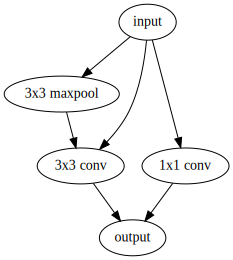

In [3]:

cf = Spec.get_spec_from_json('{"edge_0": 0, "edge_1": 0, "edge_10": 1, "edge_11": 1, "edge_12": 0, "edge_13": 1, "edge_14": 1, "edge_15": 0, "edge_16": 1, "edge_17": 0, "edge_18": 0, "edge_19": 1, "edge_2": 1, "edge_20": 1, "edge_3": 1, "edge_4": 1, "edge_5": 0, "edge_6": 0, "edge_7": 1, "edge_8": 0, "edge_9": 1, "op_node_0": "conv1x1-bn-relu", "op_node_1": "conv1x1-bn-relu", "op_node_2": "maxpool3x3", "op_node_3": "conv1x1-bn-relu", "op_node_4": "conv3x3-bn-relu"}')

s = Spec(cf)

print(s.original_matrix)
print(s.original_ops)

s.visualize()

In [46]:
i = tf.keras.Input(shape=(32, 32, 3))
nModel = NModel(spec=s, name="test")
model = nModel.build()
model.summary()

ation_298[0][0]    
__________________________________________________________________________________________________
concatenate_66 (Concatenate)    (None, 16, 16, 256)  0           re_lu_296[0][0]                  
                                                                 re_lu_298[0][0]                  
__________________________________________________________________________________________________
conv2d_307 (Conv2D)             (None, 16, 16, 128)  32768       concatenate_66[0][0]             
__________________________________________________________________________________________________
batch_normalization_299 (BatchN (None, 16, 16, 128)  512         conv2d_307[0][0]                 
__________________________________________________________________________________________________
conv2d_310 (Conv2D)             (None, 16, 16, 128)  32768       concatenate_66[0][0]             
_________________________________________________________________________________________

In [47]:
data = nModel.train_and_evaluate()
data

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 40s 1ms/sample - loss: 1.6521 - accuracy: 0.4067 - val_loss: 344.4769 - val_accuracy: 0.1014
Epoch 2/12
40000/40000 [==============================] - 36s 908us/sample - loss: 1.1444 - accuracy: 0.5858 - val_loss: 18.4263 - val_accuracy: 0.1484
Epoch 3/12
40000/40000 [==============================] - 36s 907us/sample - loss: 1.0873 - accuracy: 0.6075 - val_loss: 3.2039 - val_accuracy: 0.3261
Epoch 4/12
40000/40000 [==============================] - 36s 907us/sample - loss: 1.0891 - accuracy: 0.6051 - val_loss: 1.5006 - val_accuracy: 0.4768
Epoch 5/12
40000/40000 [==============================] - 36s 906us/sample - loss: 1.0876 - accuracy: 0.6051 - val_loss: 1.2287 - val_accuracy: 0.5500
Epoch 6/12
40000/40000 [==============================] - 36s 907us/sample - loss: 1.0887 - accuracy: 0.6062 - val_loss: 1.1573 - val_accuracy: 0.5767
Epoch 7/12
40000/40000 [===================

{'trainable_parameters': 3905034,
 'params': {'batch_size': 256,
  'epochs': 12,
  'steps': 157,
  'samples': 40000,
  'verbose': 0,
  'do_validation': True,
  'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']},
 'history': {'loss': [1.652064765548706,
   1.144368370437622,
   1.087305238723755,
   1.089054443359375,
   1.0875965162277221,
   1.088663335800171,
   1.0883508892059326,
   1.0868962003707885,
   1.0875726335525513,
   1.0873202253341674,
   1.088701929473877,
   1.0888449527740478],
  'accuracy': [0.40665,
   0.585775,
   0.607525,
   0.60505,
   0.6051,
   0.606175,
   0.606175,
   0.60525,
   0.606325,
   0.60505,
   0.605025,
   0.6055],
  'val_loss': [344.47689077148436,
   18.4263018447876,
   3.20385276184082,
   1.5006193037033082,
   1.2287452911376953,
   1.1573274543762206,
   1.131672379875183,
   1.1208266172409058,
   1.1158786193847656,
   1.1135629447937012,
   1.1123736347198487,
   1.1117985485076904],
  'val_accuracy': [0.1014,
   0.1484,
   0.

In [15]:
history.history

{'loss': [1.8895489448547362,
  1.4495863836288452,
  1.402880509185791,
  1.402955818748474],
 'accuracy': [0.3231, 0.46195, 0.4816, 0.480025],
 'val_loss': [107566.1637,
  192.51275043945313,
  17.174112457275392,
  3.8490982215881346],
 'val_accuracy': [0.1027, 0.1282, 0.1211, 0.1787]}

10000/10000 [==============================] - 4s 403us/sample - loss: 3.9102 - accuracy: 0.1745


[3.9102051452636717, 0.1745]

In [17]:
print(model.count_params())
np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables])

3742346


3728906

In [18]:
model.history.params

{'batch_size': 256,
 'epochs': 4,
 'steps': 157,
 'samples': 40000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [22]:
model.history.history

{'loss': [1.4638422157287598,
  1.1612712270736694,
  1.1123817365646362,
  1.1109454036712647],
 'accuracy': [0.4653, 0.57965, 0.59985, 0.6013],
 'val_loss': [3.754738680267334,
  7.283068478393555,
  3.8965704246521,
  2.236551708984375],
 'val_accuracy': [0.1128, 0.1562, 0.27, 0.3833]}

In [20]:
model.history.history["accuracy"][-1]

0.480025

In [21]:
data = nModel.train_and_evaluate()
data

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 40s 992us/sample - loss: 1.4638 - accuracy: 0.4653 - val_loss: 3.7547 - val_accuracy: 0.1128
Epoch 2/4
40000/40000 [==============================] - 36s 895us/sample - loss: 1.1613 - accuracy: 0.5796 - val_loss: 7.2831 - val_accuracy: 0.1562
Epoch 3/4
40000/40000 [==============================] - 36s 899us/sample - loss: 1.1124 - accuracy: 0.5998 - val_loss: 3.8966 - val_accuracy: 0.2700
Epoch 4/4
10000/10000 [==============================] - 4s 391us/sample - loss: 2.2466 - accuracy: 0.3829


{'trainable_parameters': 3728906,
 'params': {'batch_size': 256,
  'epochs': 4,
  'steps': 157,
  'samples': 40000,
  'verbose': 0,
  'do_validation': True,
  'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']},
 'history': {'loss': [1.4638422157287598,
   1.1612712270736694,
   1.1123817365646362,
   1.1109454036712647],
  'accuracy': [0.4653, 0.57965, 0.59985, 0.6013],
  'val_loss': [3.754738680267334,
   7.283068478393555,
   3.8965704246521,
   2.236551708984375],
  'val_accuracy': [0.1128, 0.1562, 0.27, 0.3833]},
 'training_time': 147.2608449459076,
 'train_accuracy': 0.6013,
 'validation_accuracy': 0.3833,
 'test_accuracy': 0.3829}